<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

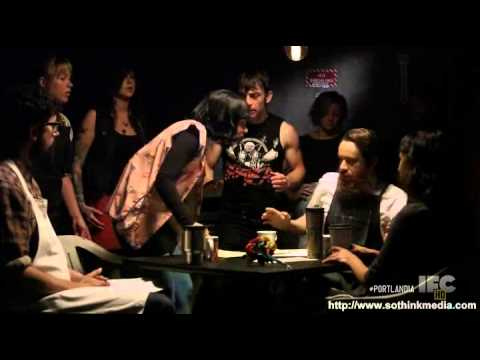

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/mnt/c/users/natedow/desktop/lambda/unit_4/nlp/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [145]:
import pandas as pd

url = "yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [146]:
shops.describe()

,coffee_shop_name,full_review_text,star_rating
count,7616,7616,7616
unique,79,6915,5
top,Epoch Coffee,"10/25/2016 1 check-in Ok, let's try this appr...",5.0 star rating
freq,400,4,3780


# Clean Star Rating

In [147]:
shops.loc[0, 'star_rating'] = '5.00 star rating'

In [148]:
sample = shops['star_rating'][0]

In [149]:
sample

'5.00 star rating'

In [150]:
sample2 = sample.split()
sample2

['5.00', 'star', 'rating']

In [151]:
# keep only numeric characters using regex and cast them to integers

import re

sample = int(re.sub('[^1-9]', '', sample))
sample

5

In [152]:
shops['star_int'] = 0
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_int
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.00 star rating,0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,0


In [153]:
#define a function that will take the star_rating column and create a new column that is the integer version of the rating
counter = 0 
for star_rating in shops['star_rating']:
    rating = shops['star_rating'][counter]
    rating = int(re.sub('[^1-9]', '', rating))
    shops.loc[counter, 'star_int'] = rating
    counter = counter + 1
    
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_int
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.00 star rating,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4


In [154]:
# use spacy for stop words and tokenization
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [155]:
# Tokenizer Pipe

tokens = []

""" Make them tokens without stopwords """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_int,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.00 star rating,5,"[ , 11/25/2016, 1, check-in, love, love, loved..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,"[ , 12/2/2016, listed, date, night:, austin,, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,"[ , 11/30/2016, 1, check-in, listed, brunch, s..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,"[ , 11/25/2016, cool, decor!, good, drinks, ni..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,"[ , 12/3/2016, 1, check-in, located, northcros..."


In [156]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                                            'coffee', "i've", 'i', "i'm", "it's", ])

In [158]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [159]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_int,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.00 star rating,5,"[11/25/2016, check-in, love, love, loved, atmo..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,"[12/2/2016, listed, date, night:, austin,, amb..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,"[11/30/2016, check-in, listed, brunch, spots, ..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,"[11/25/2016, cool, decor!, good, drinks, nice,..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,"[12/3/2016, check-in, located, northcross, mal..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [92]:
# I will initially analyze these coffee shop tokens by overal token count

In [160]:
# create dataframes for the good and bad coffee shops
good = shops[shops['star_int'] >= 4]
bad = shops[shops['star_int'] <= 3]

print(good.shape, bad.shape)

(6140, 5) (1476, 5)


In [161]:
good['token_count'] = 0
bad['token_count'] = 0

<ipython-input-161-2cd8929647e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['token_count'] = 0
<ipython-input-161-2cd8929647e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['token_count'] = 0


In [162]:
good = good.reset_index()
good.head()

,index,coffee_shop_name,full_review_text,star_rating,star_int,tokens,token_count
0,0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.00 star rating,5,"[11/25/2016, check-in, love, love, loved, atmo...",0
1,1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,"[12/2/2016, listed, date, night:, austin,, amb...",0
2,2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,"[11/30/2016, check-in, listed, brunch, spots, ...",0
3,4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,"[12/3/2016, check-in, located, northcross, mal...",0
4,5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,4,"[11/20/2016, check-in, cute, cafe!, think, mom...",0


In [163]:
bad = bad.reset_index()
bad.head()

,index,coffee_shop_name,full_review_text,star_rating,star_int,tokens,token_count
0,3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,"[11/25/2016, cool, decor!, good, drinks, nice,...",0
1,8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,3,"[10/25/2016, check-in, ok,, let's, try, approa...",0
2,11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0 star rating,3,"[11/20/2016, store, a+, decoration,, honestly,...",0
3,12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0 star rating,3,"[11/17/2016, check-in, listed, 2016, -, time, ...",0
4,25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0 star rating,1,"[12/2/2016, okay,, visiting, friends, la, tryi...",0


In [164]:
counter = 0
for tokens in good['tokens']:
    token_count = len(good.loc[counter, 'tokens'])
    good.loc[counter, 'token_count'] = token_count
    counter = counter + 1



In [165]:
counter = 0
for tokens in bad['tokens']:
    token_count = len(bad.loc[counter, 'tokens'])
    bad.loc[counter, 'token_count'] = token_count
    counter = counter + 1

In [166]:
good.head()

,index,coffee_shop_name,full_review_text,star_rating,star_int,tokens,token_count
0,0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.00 star rating,5,"[11/25/2016, check-in, love, love, loved, atmo...",46
1,1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,"[12/2/2016, listed, date, night:, austin,, amb...",28
2,2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,"[11/30/2016, check-in, listed, brunch, spots, ...",111
3,4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,"[12/3/2016, check-in, located, northcross, mal...",67
4,5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,4,"[11/20/2016, check-in, cute, cafe!, think, mom...",81


In [167]:
describe_good = good.describe()
describe_good

,index,star_int,token_count
count,6140.000000,6140.000000,6140.000000
mean,3718.035831,4.615635,48.735505
std,2207.955424,0.486484,37.574353
min,0.000000,4.000000,4.000000
25%,1795.750000,4.000000,23.000000
50%,3661.500000,5.000000,38.000000
75%,5601.500000,5.000000,64.000000
max,7615.000000,5.000000,430.000000


In [168]:
describe_bad = bad.describe()
describe_bad

,index,star_int,token_count
count,1476.000000,1476.000000,1476.000000
mean,4179.661247,2.311653,57.651084
std,2120.320847,0.769168,42.636002
min,3.000000,1.000000,4.000000
25%,2437.250000,2.000000,28.000000
50%,4400.500000,2.500000,47.000000
75%,6021.250000,3.000000,74.000000
max,7614.000000,3.000000,401.000000


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [169]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [170]:
good_wc = count(good['tokens'])

In [171]:
good_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
72,place,2432,3389,1.0,0.011326,0.011326,0.396091
86,great,2174,2902,2.0,0.009698,0.021024,0.354072
328,good,1643,2180,3.0,0.007285,0.028309,0.267590
246,like,1486,2068,4.0,0.006911,0.035220,0.242020
3,love,1263,1604,5.0,0.005360,0.040580,0.205700


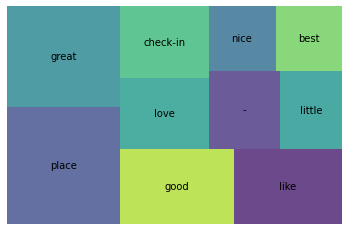

In [177]:
good_wc_top10 = good_wc[good_wc['rank'] <= 10]

squarify.plot(sizes=good_wc_top20['pct_total'], label=good_wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [173]:
bad_wc = count(bad['tokens'])

In [174]:
bad_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
41,place,597,875,1.0,0.010283,0.010283,0.404472
29,like,548,834,2.0,0.009801,0.020084,0.371274
15,good,441,599,3.0,0.007039,0.027123,0.298780
208,don't,340,430,4.0,0.005053,0.032177,0.230352
131,food,266,369,5.0,0.004336,0.036513,0.180217


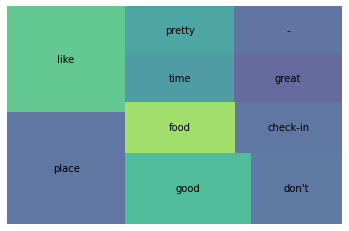

In [178]:
bad_wc_top10 = bad_wc[bad_wc['rank'] <= 10]

squarify.plot(sizes=bad_wc_top10['pct_total'], label=bad_wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

